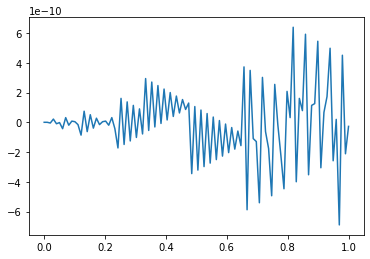

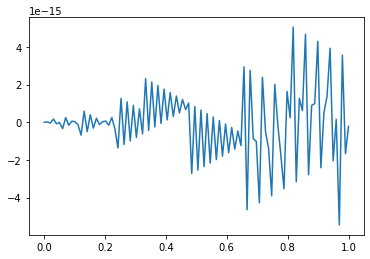

In [ ]:
import matplotlib.pyplot as plt
import math as mt
import numpy as np

Nt = 100;
N = 100;
L = 1e-4;
tao = 1/Nt;
h = 1/N;

u = [[[0 for n in range(Nt)] for i in range(N)] for j in range(N)];
#Начальные условия
for i in range(N):
    for j in range(N):
        u[0][i][j] = mt.cos(mt.pi * i)*mt.sin(5*mt.pi*j);

#Граничные условия
for t in range(Nt):
    for j in range(N):
        u[t][0][j] = mt.sin(5*mt.pi*j)*mt.exp(-50*mt.pi **2 * L * t);
        
for t in range(Nt):
    for j in range(N):
        u[t][1][j] = -mt.sin(5*mt.pi*j)*mt.exp(-50*mt.pi **2 * L * t);
        
for t in range(Nt):
    for i in range(N):
        u[t][i][0] = 0
        
for t in range(Nt):
    for i in range(N):
        u[t][i][1] = 0;

#Прогон(хнык)
a = -1/tao -26*L/h/h;
b = 25*L/h/h;
c = 25*L/h/h;
g = L/h/h;
f = L/h/h;

for t in range(Nt-1):
    n = t+1;
    
    if (n % 2 == 0):
        for j in range(N):
            p = [0 for m in range(N)];
            q = [0 for m in range(N)];
            p[1] = 0; q[1] = u[n][0][j];
            d = [u[n][m][j] for m in range(N)];
        
            for m in range(N-4):
                i = m + 2;
                p[i] = -c/(a*p[i-1] + b);
                q[i] = (d[i-1] - a*q[i-1])/(a*p[i-1] + b);
            
            for m in range(N-2):
                i = -m+1;
                u[n][i][j] = p[i+1]*u[n][i+1][j] + q[i+1];
    else:
        for i in range(N):
            p = [0 for m in range(N)];
            q = [0 for m in range(N)];
            p[1] = 0; q[1] = u[n][i][0];
            d = [u[n][i][m] for m in range(N)];
        
            for m in range(N-4):
                j = m + 2;
                p[j] = -c/(a*p[j-1] + b);
                q[j] = (d[j-1] - a*q[j-1])/(a*p[j-1] + b);
            
            for m in range(N-2):
                j = -m+1;
                u[n][i][j] = p[j+1]*u[n][i][j+1] + q[j+1];

#Вроде все
#Аналитическое:
u2 = [[[0 for n in range(Nt)] for i in range(N)] for j in range(N)];
for t in range(Nt):
    for i in range(N):
        for j in range(N):
            u2[t][i][j] = mt.cos(mt.pi*i)*mt.sin(5*mt.pi*j)*mt.exp(-50*mt.pi**2*L*t);
            
#Графики есть и в следующей графе
y = np.linspace(0, 1, N);
plt.plot(y, u[70][20]);
plt.show();
plt.plot(y, u2[70][20]);
plt.show();

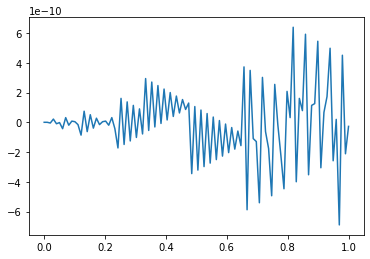

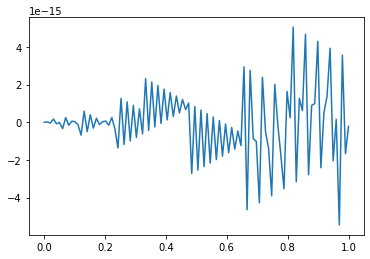

In [ ]:
#Ииии графикииии
y = np.linspace(0, 1, N);
plt.plot(y, u[70][20]);
plt.show();
plt.plot(y, u2[70][20]);
plt.show();